# **Exploratory data analysis**

## **Checklist**

**Shape analysis**

- **target variable** : 'Weekly_Sales'
- **lines and columns** : 150, 8
- **variables type** : qualitative : 1 (date), quantitative : 7
- **missing values analysis** : all columns except 'Store' have ~10% NaN values. target : 9.3 % Nan values. we continue to work with missing
data as they can be imputed during preprocessing except for the target.

**In-depth analysis**

- **target visualization** : 50% of the values lies between 0.6 and 1.8 M$
- **features visualization** : There seem to be some outliers
- **signification of the features** :
   - **Store** : the store number
   - **Date** : the week of sales 
   - **Weekly_Sales** : sales for the given store
   - **Holiday_Flag** : whether the week is a special holiday week 1 - holiday week 0 - non holiday week
   - **Temperature** : temperature on the day of sale
   - **Fuel_Price** : cost of fuel in the region
   - **CPI** : prevailing consumer price index
   - **Unemployment** : prevailing unemployment rate
- **relationship features / target** : in holidays week, we don't see a particular increase in weekly sales (not enough data perhaps). avg weekly sales fluctuate a lot depending on the store. some feature are highly correlated (CPI/Store, Year/Fuel_Price)
- **missing values** : Drop lines where target values are missing
- **pandas preprocessing** : fixing outliers for Unemployment, Fuel_Price, CPI and Temperature columns, creating useful feature from the Date column (Day, Day_of_Week, Year, Month)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

pd.set_option('display.max_row', 150)

In [3]:
data = pd.read_csv('Walmart_Store_sales.csv')

## **Shape analysis**

In [4]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


In [5]:
data.shape

(150, 8)

In [6]:
data.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
data.dtypes.value_counts()

float64    7
object     1
dtype: int64

In [8]:
data['Holiday_Flag'].value_counts()

0.0    127
1.0     11
Name: Holiday_Flag, dtype: int64

In [9]:
data['Store'].value_counts()

3.0     15
1.0     11
18.0    10
19.0     9
5.0      9
14.0     9
13.0     9
7.0      8
17.0     8
2.0      8
8.0      8
6.0      7
20.0     7
4.0      7
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

In [10]:
# Basic stats

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isna().sum()/data.shape[0])

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

<AxesSubplot:>

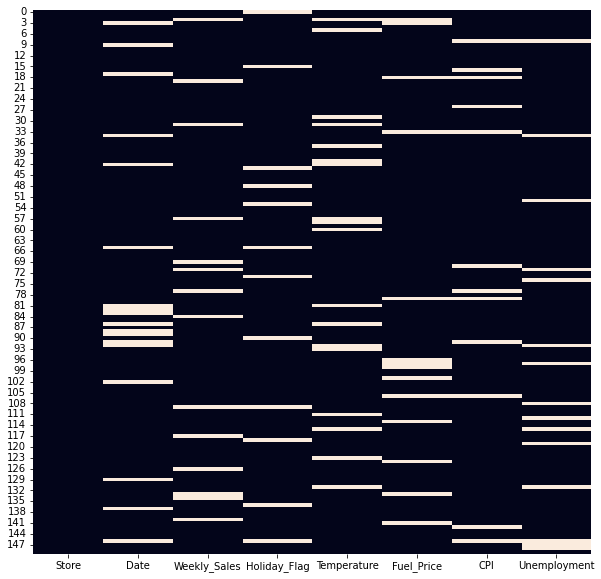

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.isna(), cbar=False)

## **In-depth analysis**

### **1. Visualizing target**

Drop lines where target values are missing, create usable features from the date column

In [12]:
to_keep = ~data['Weekly_Sales'].isna()

data = data.loc[to_keep,:]

In [13]:
holidays_events = pd.DatetimeIndex(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08',
'2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06',
'2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29',
'2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27',
])

In [14]:
data[data['Holiday_Flag'].isna()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
15,6.0,30-04-2010,1498080.16,NaN,68.91,2.780,211.894272,7.092
43,7.0,26-08-2011,629994.47,NaN,57.60,3.485,194.379637,8.622
48,1.0,05-08-2011,1624383.75,NaN,91.65,3.684,215.544618,7.962
53,14.0,25-03-2011,1879451.23,NaN,41.76,3.625,184.994368,8.549
65,10.0,NaN,1714309.90,NaN,43.43,3.287,127.191774,8.744
73,1.0,27-08-2010,1449142.92,NaN,85.22,2.619,211.567306,7.787
90,9.0,09-07-2010,485389.15,NaN,78.51,2.642,214.656430,6.442
118,9.0,18-06-2010,513073.87,NaN,82.99,2.637,215.016648,6.384
136,4.0,08-07-2011,2066541.86,NaN,84.59,3.469,129.112500,5.644


In [15]:
data['Is_Holiday'] = data['Holiday_Flag'].apply(lambda x : True if x == 1.0 else False)

In [16]:
data['Is_Holiday'].value_counts()

False    127
True       9
Name: Is_Holiday, dtype: int64

In [17]:
data['Date'] = pd.to_datetime(data['Date'])

<AxesSubplot:xlabel='Date'>

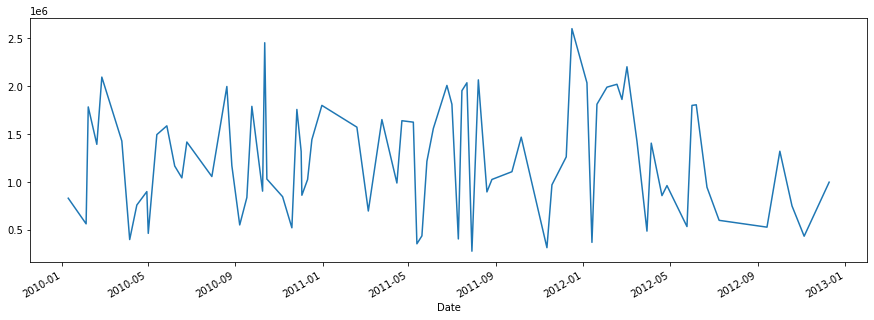

In [18]:
time_data = data.groupby('Date')['Weekly_Sales'].mean()
plt.figure(figsize=(15, 5))
time_data.plot.line()

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

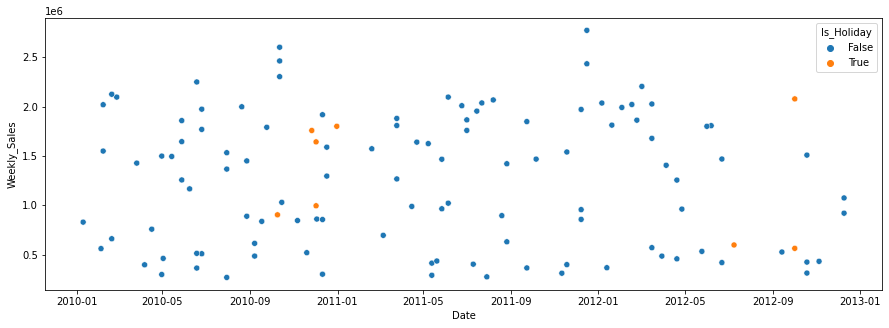

In [19]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=data, x = 'Date', y= 'Weekly_Sales', hue='Is_Holiday')

In [20]:
data[data['Date'].isna()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Is_Holiday
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,False
9,3.0,NaT,418925.47,0.0,60.12,3.555,224.132020,6.833,False
17,18.0,NaT,1205307.50,0.0,21.33,2.788,131.527903,9.202,False
34,2.0,NaT,1853161.99,0.0,87.70,3.480,214.929625,NaN,False
42,1.0,NaT,1661767.33,1.0,NaN,3.730,222.439015,6.908,True
65,10.0,NaT,1714309.90,NaN,43.43,3.287,127.191774,8.744,False
81,5.0,NaT,359206.21,0.0,NaN,3.630,221.434215,5.943,False
82,11.0,NaT,1569607.94,0.0,52.77,3.510,223.917015,6.833,False
83,15.0,NaT,607475.44,0.0,79.97,3.972,135.873839,7.806,False
86,17.0,NaT,986922.62,0.0,NaN,3.793,131.037548,6.235,False


In [21]:
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.weekday
data['Month'] = data['Date'].dt.month
data['Year']  = data['Date'].dt.year
data.drop('Date',axis=1,inplace=True)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Is_Holiday,Day,Week,Day_of_Week,Month,Year
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,False,18.0,18.0,4.0,2.0,2011.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,False,25.0,25.0,4.0,3.0,2011.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,False,NaN,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,False,28.0,28.0,4.0,5.0,2010.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,False,28.0,28.0,4.0,5.0,2010.0


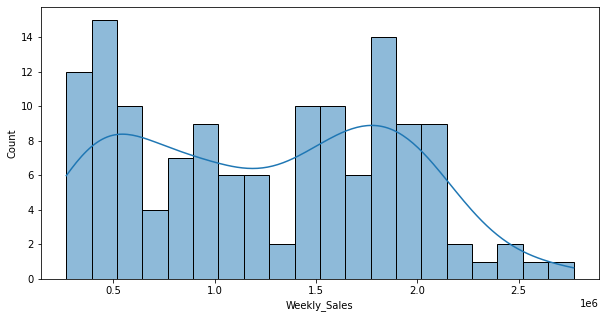

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Weekly_Sales', kde=True, bins = 20)
plt.show()

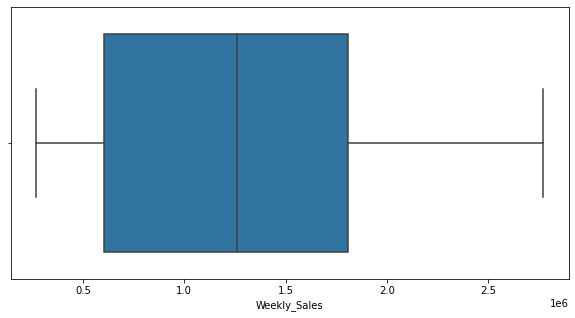

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Weekly_Sales')
plt.show()

### **2. Visualizing categorical features**

In [24]:
categorical_features = ['Store', 'Holiday_Flag']

In [25]:
data['Store'].nunique()

20

<AxesSubplot:xlabel='Store', ylabel='count'>

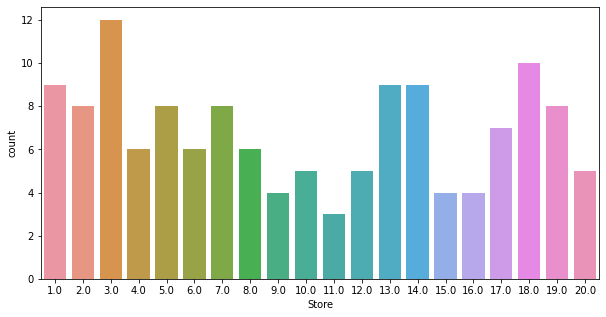

In [26]:
plt.figure(figsize= (10, 5))
sns.countplot(data=data, x='Store')

<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

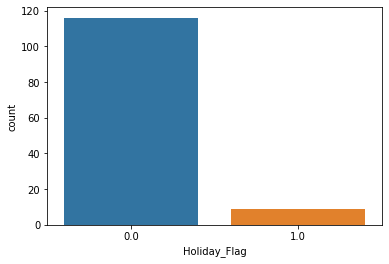

In [27]:
sns.countplot(data=data, x='Holiday_Flag')

### **3. Visualizing numerical features**

In [28]:
numerical_features = [
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'Day',
    'Day_of_Week',
    'Month',
    'Year',
    ]

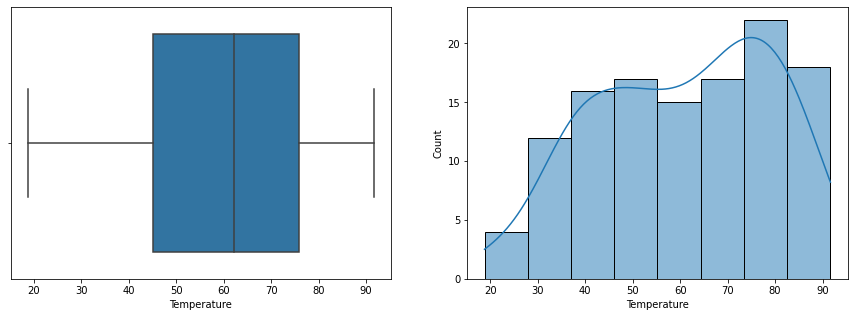

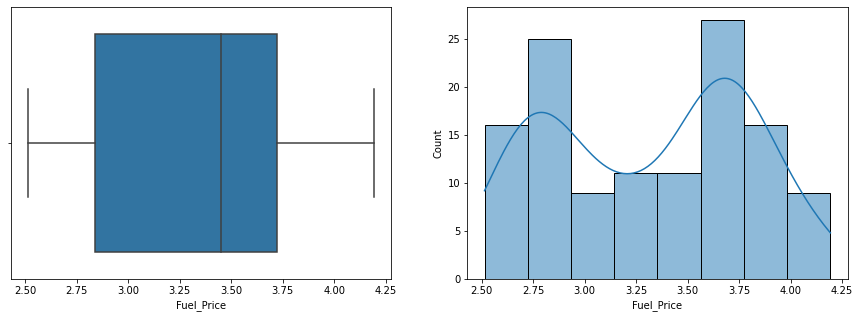

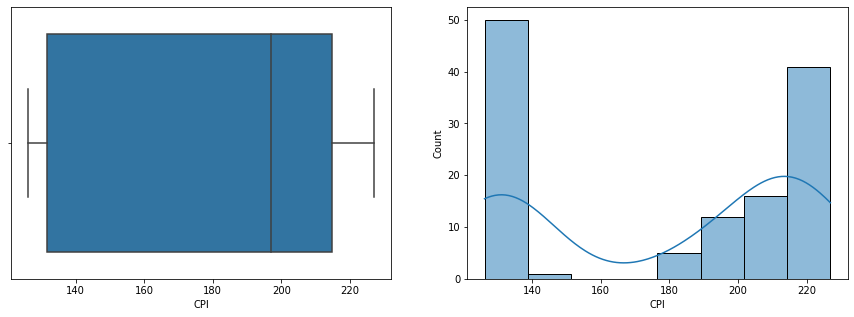

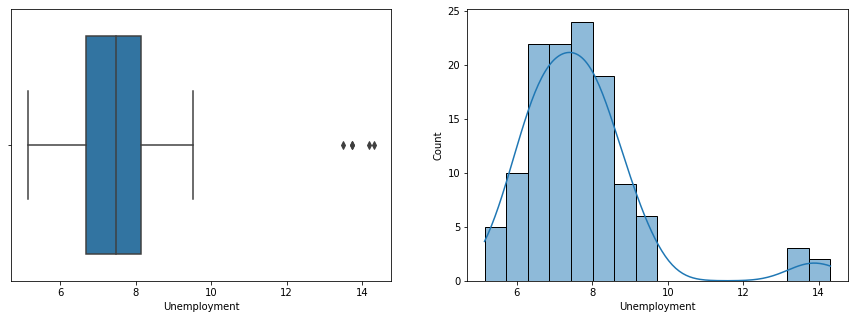

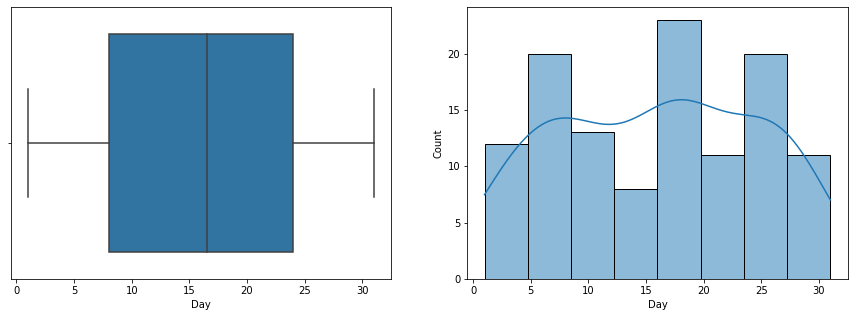

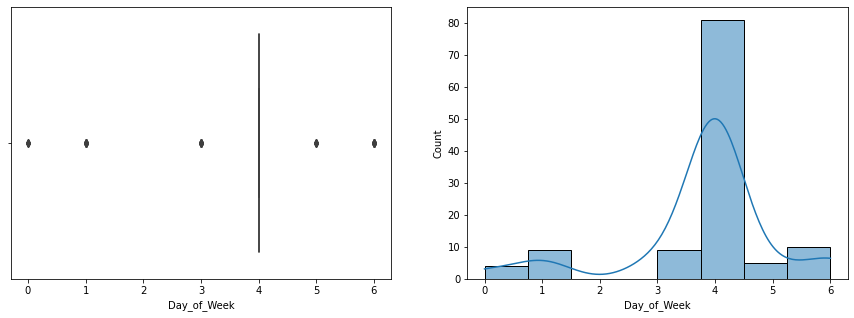

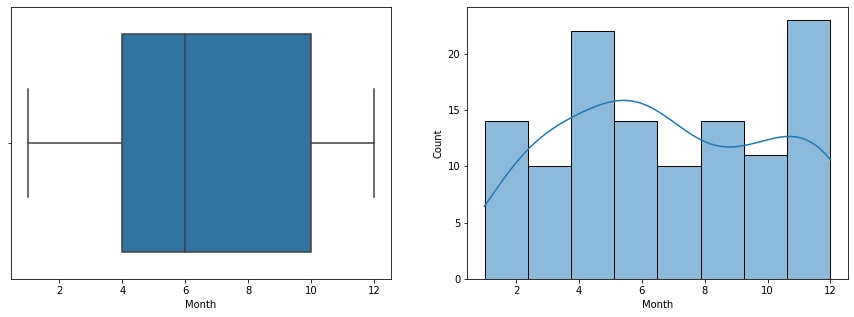

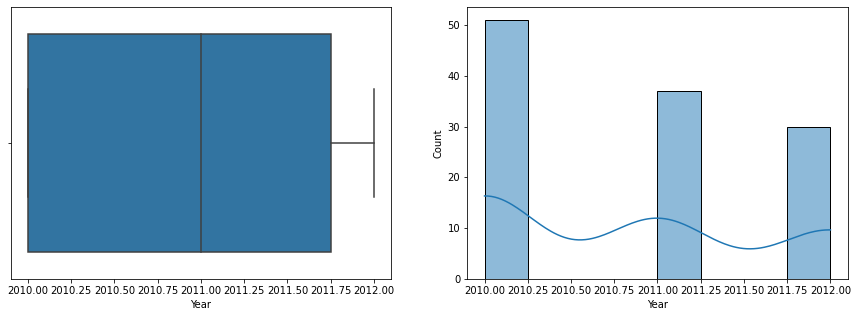

In [29]:
for col in numerical_features:
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    sns.boxplot(data=data, x=col, ax=ax[0])
    sns.histplot(data=data, x=col, kde=True, ax=ax[1])

### **4. Target / features relationship**

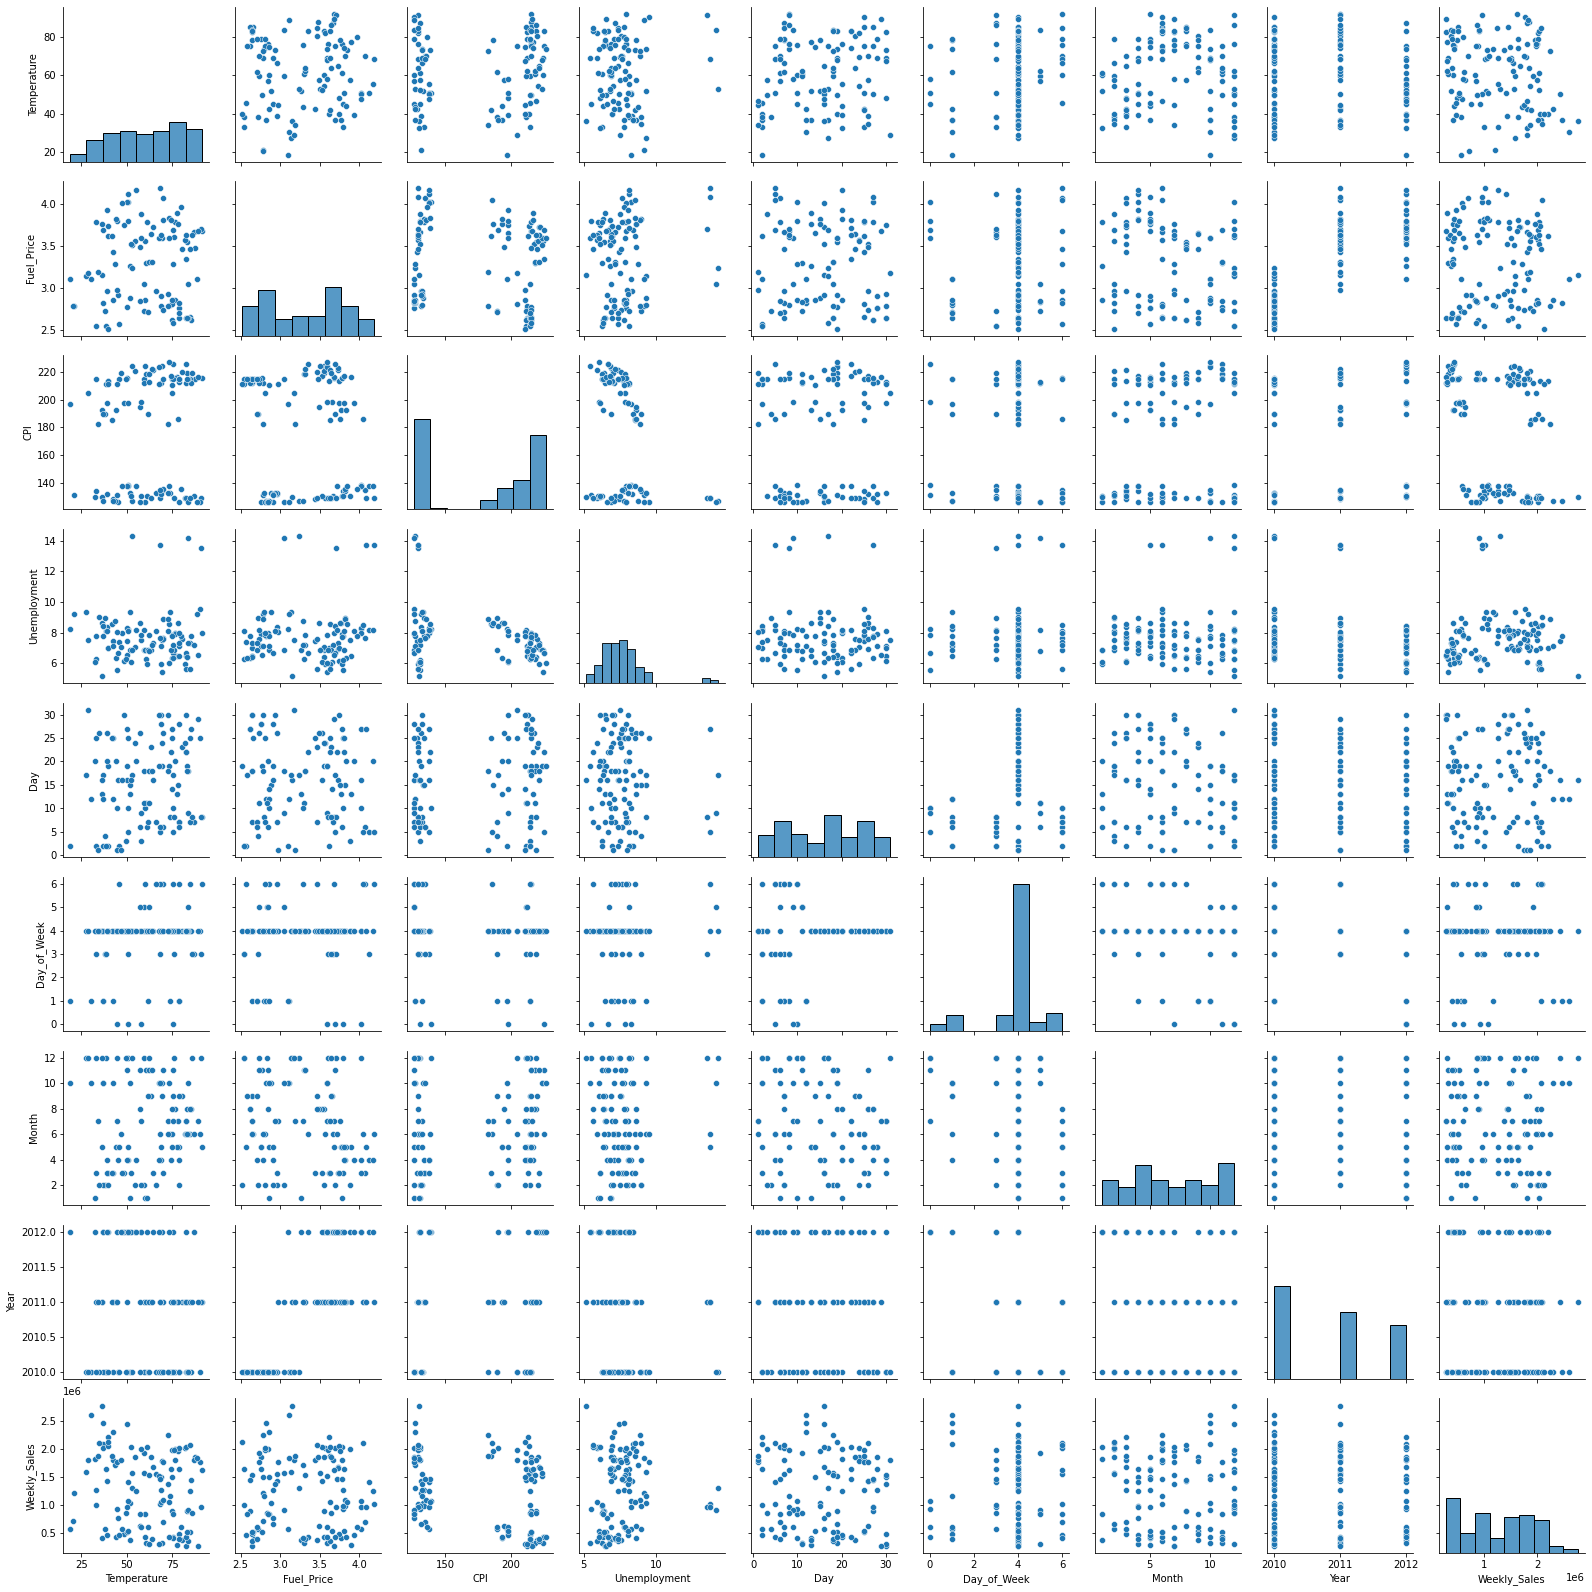

In [30]:
sns.pairplot(data=data[numerical_features + ['Weekly_Sales']])

In [31]:
#for col in numerical_features:
#    plt.figure(figsize=(5, 5))
#    sns.scatterplot(data=data, x= 'Weekly_Sales', y= col)
#    plt.show()

In [32]:
#data.groupby('Store')['Weekly_Sales'].mean().plot(kind= 'bar', ylabel = 'Avg weekly sales ($)', figsize=(10, 5))

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

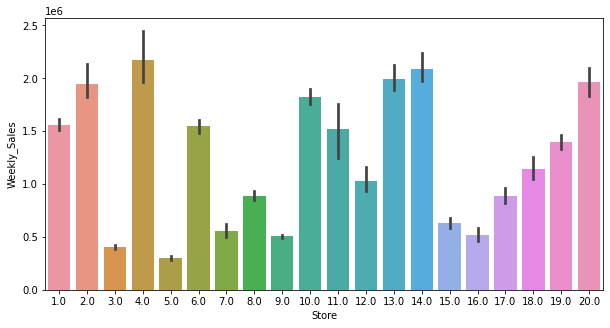

In [33]:
# Avg weekly sales for each store

plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='Store', y='Weekly_Sales')

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

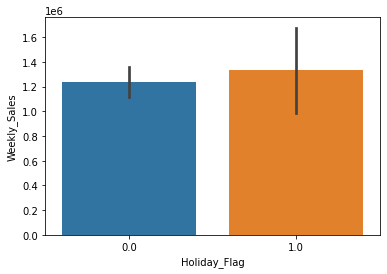

In [34]:
# Avg weekly sales off holidays and on holidays

sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=data)

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

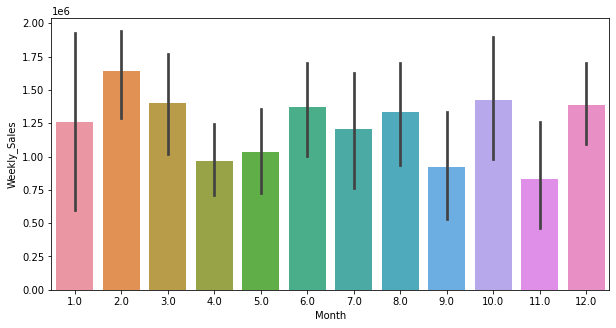

In [35]:
# Avg weekly sales for each month

plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Weekly_Sales', data=data)

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

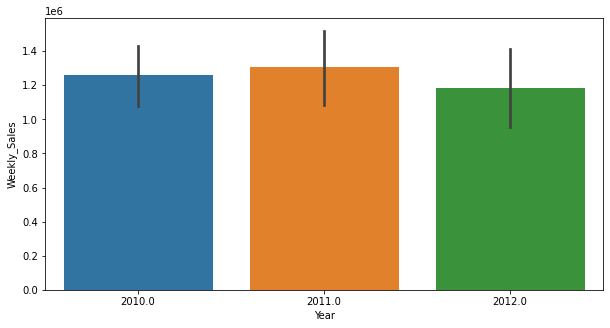

In [36]:
# Avg weekly sales for each year

plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Weekly_Sales', data=data)

<AxesSubplot:>

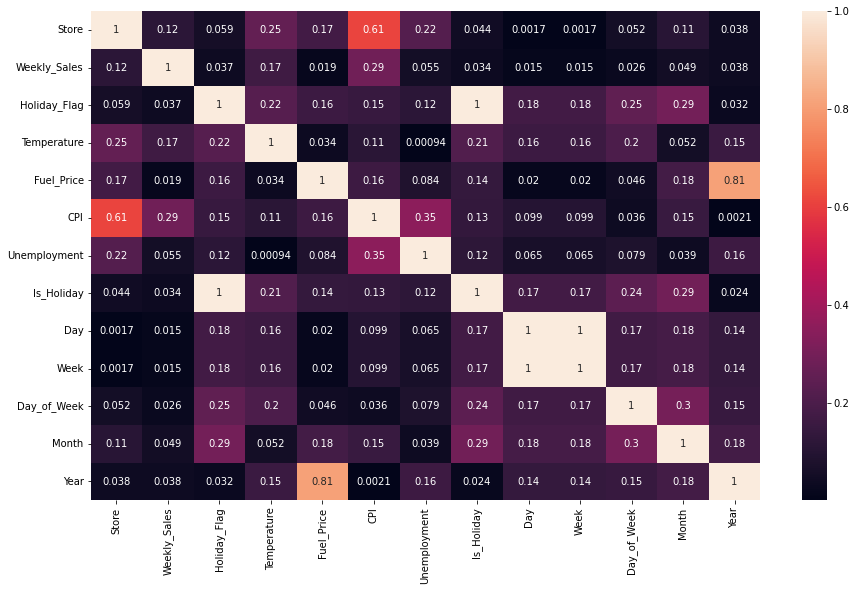

In [37]:
# Draw a heatmap with the numeric values in each cell
plt.figure(figsize=(15, 9))
sns.heatmap(data.corr(method='pearson').abs(), annot=True)

In [38]:
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    col_mean = data[col].mean()
    col_std = data[col].std()
    to_keep = (data[col] > col_mean - 3 * col_std) | (data[col] < col_mean + 3 * col_std) | (data[col].isna())
    data = data.loc[to_keep, :]

In [39]:
data.shape

(136, 13)

In [40]:
data['Temperature'].isna().sum()

15

# **Modeling**

## **Preprocessing**

Preprocessing with sklearn, new dataset shape after cleaning outliers: 136, 11.  
- **categorical features** : Store, Holiday_Flag
- **numerical features** : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, Day_of_Week, Week

In [41]:
data['Holiday_Flag'] = data['Holiday_Flag'].fillna(0.0)

In [42]:
data['Day'] = data['Day'].fillna(-999)
data['Week'] = data['Week'].fillna(-999)
data['Day_of_Week'] = data['Day_of_Week'].fillna(-999)
data['Month'] = data['Month'].fillna(-999)
data['Year']  = data['Year'].fillna(-999)

In [43]:
data.isna().sum()

Store            0
Weekly_Sales     0
Holiday_Flag     0
Temperature     15
Fuel_Price      12
CPI             11
Unemployment    14
Is_Holiday       0
Day              0
Week             0
Day_of_Week      0
Month            0
Year             0
dtype: int64

In [44]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'

features_list = [
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    #'Year',
    'Day_of_Week',
    'Week',
    'Day',
    #'Month',
    'Store',
    'Holiday_Flag'
]

print("Separating labels from features...")
Y = data.loc[:,target_name]
X = data.loc[:,features_list] # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

   Temperature  Fuel_Price         CPI  Unemployment  Day_of_Week   Week  \
0        59.61       3.045  214.777523         6.858          4.0   18.0   
1        42.38       3.435  128.616064         7.470          4.0   25.0   
3        84.57         NaN  214.556497         7.346       -999.0 -999.0   
4        78.89       2.759  212.412888         7.092          4.0   28.0   
5          NaN       2.756  126.160226         7.896          4.0   28.0   

     Day  Store  Holiday_Flag  
0   18.0    6.0           0.0  
1   25.0   13.0           0.0  
3 -999.0   11.0           0.0  
4   28.0    6.0           0.0  
5   28.0    4.0           0.0  



In [45]:
# divide dataset into train set & test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [46]:
numerical_features = [
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    #'Year',
    'Day_of_Week',
    'Week',
    'Day',
    #'Month'
]

categorical_features = ['Store', 'Holiday_Flag']

In [47]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [48]:
print("Preprocessing X_train...")
print()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

# Test pipeline
print("Preprocessing X_test...")
print()
X_test = preprocessor.transform(X_test)
print("...Done!")
print(X_test[0:5,:]) # X_test is now a numpy array
print()

#Y_train = Y_train.to_numpy()
#Y_test = Y_test.to_numpy()

Preprocessing X_train...

...Done!
  (0, 0)	1.2095885387164262
  (0, 1)	-1.5030447983421744
  (0, 2)	0.9817446167889817
  (0, 3)	-0.7772480351323763
  (0, 4)	0.35447622086611913
  (0, 5)	0.3603664814465057
  (0, 6)	0.3603664814465057
  (0, 14)	1.0
  (1, 0)	-0.5819095875543866
  (1, 1)	-0.978390862193328
  (1, 2)	-1.1275019512324032
  (1, 3)	0.9967676815593336
  (1, 4)	0.35447622086611913
  (1, 5)	0.3509625880840163
  (1, 6)	0.3509625880840163
  (1, 23)	1.0
  (2, 0)	1.3009856016646948
  (2, 2)	0.9699448074367947
  (2, 3)	-0.19814958943932404
  (2, 4)	-2.8284052570103304
  (2, 5)	-2.827553368437386
  (2, 6)	-2.827553368437386
  (2, 16)	1.0
  (3, 0)	1.4340319591210362
  (3, 1)	0.7370751199033135
  (3, 2)	-1.179909731774659
  (3, 3)	-0.3040969142230842
  (3, 4)	0.3513028594724238
  (3, 5)	0.32588553911737805
  (3, 6)	0.32588553911737805
  (3, 15)	1.0
  (4, 0)	0.4072611570123202
  (4, 1)	-0.9174352181594371
  (4, 2)	-1.1395394150730973
  (4, 4)	0.35447622086611913
  (4, 5)	0.391712792654803

Train model

In [49]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


Performance assessment

In [50]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[ 520431.37748574 1173571.27703457 1457311.9391486  1874771.76959958
 1185214.09694052  416943.82441555 2079413.25747213  385859.49305122
  529119.33789765 1548998.94273199 1407866.77854268  844851.92618838
  420667.14340605  909141.87968545  333198.6826397  2111892.70649504
 1122520.28370438  357188.38709444 2003506.59337326  531190.03760148
  483603.43184271 2132389.55197601 2313524.58865146 1586230.73988989
  701085.98399774 1011219.53828012 2067027.3222111  1909776.02271529
 2060770.74352694  912372.58798546  263561.18473792 1527783.17729615
 1820713.97254983  525192.92670896  886079.34057409 1374879.11904941
  541970.52156784 1065035.01365654  524594.19279396 2028936.62621068
  408036.54268453 1693120.37269963 1058106.11420324 1997778.42707858
 1776466.16388117 2133025.55804738 1993141.05357436 2144951.11542748
 1956849.06507316  497607.75533043  587557.42921449  903388.92927786
  421496.77465383 2099841.26451793 1634268.229263   1075516.930

In [51]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 951105.04059513  424204.60327958 1649026.38952551 1510259.30050402
  337427.07515008  451373.17145691 1348421.77949057 2020628.12200831
 1438519.69134323  413833.39147885  593369.36440382 1555666.59924091
 1952537.93101631 1578238.1332988  1946642.91065028 1389129.39044903
  553537.35786705 2095137.02496001 2036401.08423958  915252.90932597
 1941943.96730406  601335.503417   1941785.83634302  334404.26769092
 2050678.67966637 2005090.92792829 2133366.36912428 1270459.91361784]



In [52]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9606792859919273
R2 score on test set :  0.9442860765822482


Visualize model quality

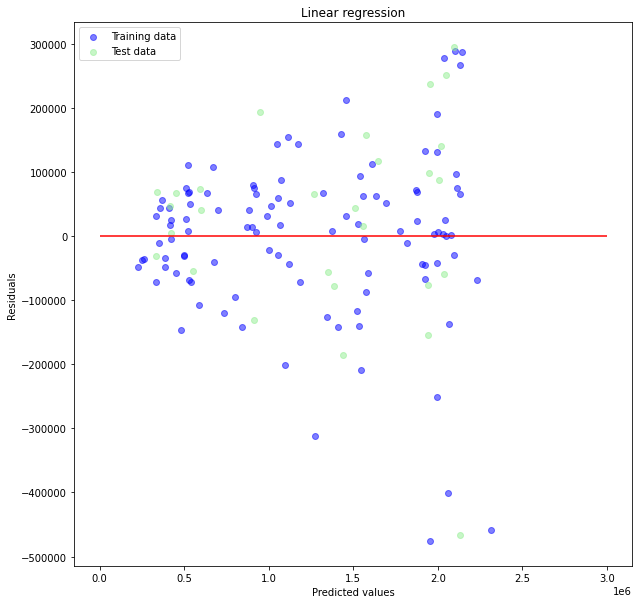

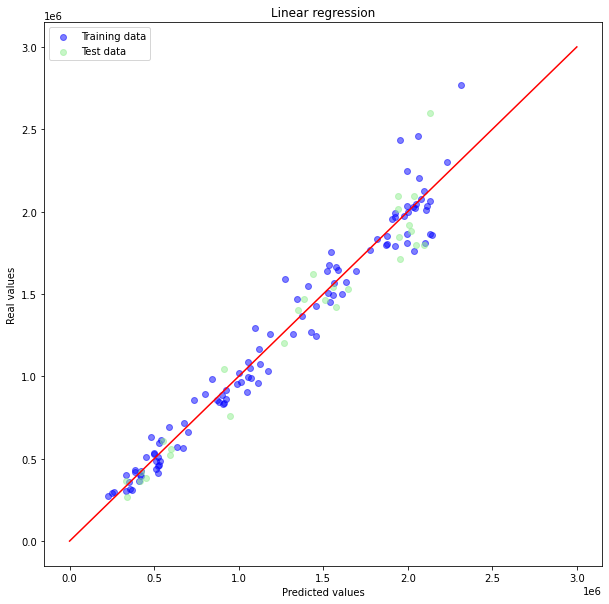

In [53]:
# Plot residuals
plt.figure(figsize=(10, 10))
plt.scatter(Y_train_pred, Y_train_pred - Y_train, c = "blue", marker = "o", alpha=0.5, label = "Training data")
plt.scatter(Y_test_pred, Y_test_pred - Y_test, c = "lightgreen", marker = "o", alpha=0.5, label = "Test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 3*10**6, color = "red")
plt.show()

# Plot predictions
plt.figure(figsize=(10, 10))
plt.scatter(Y_train_pred, Y_train, c = "blue", marker = "o", alpha=0.5,  label = "Training data")
plt.scatter(Y_test_pred, Y_test, c = "lightgreen", marker = "o", alpha=0.5, label = "Test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 3*10**6], [0, 3*10**6], c = "red")
plt.show()

Feature importance

In [54]:
regressor.coef_

array([  -48700.03829952,   -42388.52774831,    52595.64083959,
         -72071.60005966,   216373.15832486,  -108051.36570549,
        -108051.36570549,   404994.60464225, -1167687.44481726,
         670105.98899499, -1265768.86958579,     7806.37114313,
        -998456.08471701,  -736929.5410092 , -1098703.39292027,
         502552.34617609,   -51530.83367945,   -92023.93605146,
         506268.38405233,   515678.2543269 ,  -782704.59768906,
       -1080067.72659322,  -619942.64470093,  -273809.09367842,
         -51961.04438281,   433904.17650164,    10115.73137676])

In [55]:
preprocessor.transformers_

[('num',
  Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['Temperature',
   'Fuel_Price',
   'CPI',
   'Unemployment',
   'Day_of_Week',
   'Week',
   'Day']),
 ('cat',
  Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))]),
  ['Store', 'Holiday_Flag'])]

In [56]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day_of_Week', 'Week', 'Day', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_12.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [57]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Temperature,-4.870004e+04
Fuel_Price,-4.238853e+04
CPI,5.259564e+04
Unemployment,-7.207160e+04
Day_of_Week,2.163732e+05
Week,-1.080514e+05
Day,-1.080514e+05
Store_2.0,4.049946e+05
Store_3.0,-1.167687e+06
Store_4.0,6.701060e+05


In [58]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
Store_6.0,7.806371e+03
Holiday_Flag_1.0,1.011573e+04
Fuel_Price,4.238853e+04
Temperature,4.870004e+04
Store_11.0,5.153083e+04
Store_19.0,5.196104e+04
CPI,5.259564e+04
Unemployment,7.207160e+04
Store_12.0,9.202394e+04
Week,1.080514e+05


In [59]:
coefs.index

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Day_of_Week',
       'Week', 'Day', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0',
       'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0',
       'Store_11.0', 'Store_12.0', 'Store_13.0', 'Store_14.0', 'Store_15.0',
       'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0',
       'Holiday_Flag_1.0'],
      dtype='object')

Text(0.5, 0, 'feature importance')

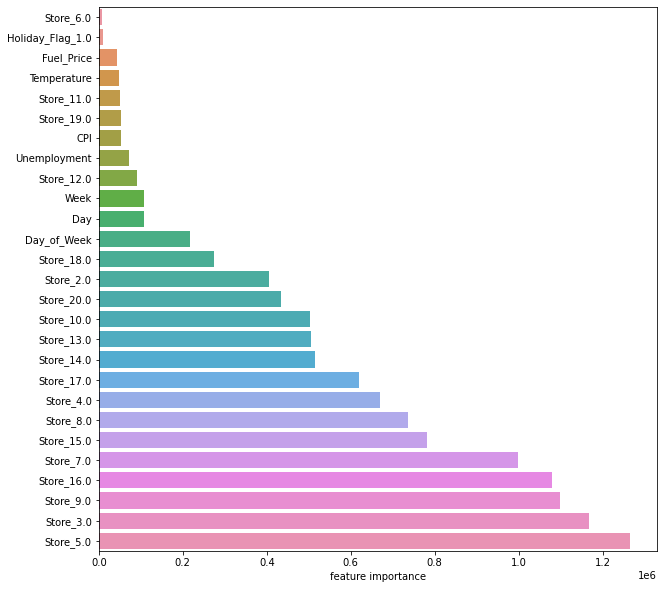

In [60]:
plt.figure(figsize=(10, 10))
sns.barplot(y = feature_importance.index, x = feature_importance['coefficients'])
plt.xlabel("feature importance")

Regularization

In [61]:
# Train model
print("Train model...")
lasso_regressor = Lasso(alpha=0.01)
lasso_regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


c:\Users\Baptiste Cournault\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876654745173.0344, tolerance: 4458040529.826312
  model = cd_fast.sparse_enet_coordinate_descent(


In [62]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = lasso_regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[ 520747.30988125 1172328.42151893 1454461.5985577  1872668.08953296
 1189743.61162849  419389.23494946 2079655.68379087  389403.53394028
  528538.10710174 1553139.52511664 1400082.54932248  847823.3146937
  423609.26847346  907671.19518356  329680.96949698 2113007.71112546
 1118515.24230113  357814.35855162 2003007.4381792   526456.99184025
  485741.52924402 2128483.54311871 2314290.18481888 1587323.53627451
  703648.06394504 1017509.61470594 2061079.07507874 1909582.09279501
 2060877.35376929  913393.09858225  268261.52693578 1527950.7337578
 1821770.82399732  525763.0876726   883044.00832979 1377867.33929319
  537619.75615107 1064299.66899481  522017.1164662  2029562.70346059
  409556.58409216 1690180.40457633 1057408.97906641 2002230.41991179
 1780641.7232276  2126504.37471034 1997045.81193743 2148553.98757207
 1958002.20366597  495335.91716367  583195.31689182  908858.23381102
  419293.0753694  2103135.87106416 1631923.44879134 1074063.11621

In [63]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = lasso_regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 953992.44153463  426745.11538833 1651812.89514288 1514402.96852602
  341906.93661056  453489.39469629 1341821.30933806 2026592.90310846
 1431846.63077168  415606.68246966  595572.15691329 1555625.13622412
 1955885.46094611 1579299.22148542 1949524.63552107 1382365.61278378
  554579.52152807 2105108.33669168 2043028.86851641  917201.87519141
 1937266.65905506  594906.84421735 1935437.17609836  338189.75664336
 2044754.18757866 2002090.67528922 2135947.33453472 1271795.00747201]



In [64]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9606584663958092
R2 score on test set :  0.943191775905278


In [99]:
# Train model
print("Train model...")
ridge_regressor = Ridge(alpha=50)
ridge_regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [100]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = ridge_regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[1090294.48624909 1386256.24609949 1221430.614352   1315319.92708646
 1357384.74027772  981011.46985686 1364125.15113983  919933.22503335
 1058428.73084956 1161769.26968802 1393073.71768863 1454637.26804062
  921765.71959719 1402607.98887759 1018130.40458434 1398293.77584097
 1337626.58520603  949591.67738618 1305769.00137556 1130834.95358216
 1063626.87573212 1367080.87623565 1578793.96696423 1158292.21724715
 1375055.50457376 1203934.62013654 1201117.327308   1162816.90411594
 1585195.37717501 1128385.55950437  996343.13249257 1022305.89146865
 1522359.24421501 1062370.45259789 1402989.31900394 1375321.11221293
 1205596.84925875 1383867.40572821 1098096.83350282 1474880.08174306
 1018730.40908962 1256792.37754599 1400703.21120425 1501783.38315824
 1325598.79339115 1411649.13171605 1164257.90232842 1527351.41111679
 1340656.5560027  1086240.13877366 1223615.00835849 1124357.1690225
 1027595.12295475 1551168.29673926 1176943.9922429  1259478.8434

In [101]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = ridge_regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[1437991.21616106 1126131.71374525 1216113.69201699 1043571.97739264
 1038835.24329992 1234490.89204825 1294822.30402913 1280452.9230568
  972115.62251549 1172492.97775973 1162463.26185467 1082759.39735554
 1628573.47133848 1110331.91563695 1426324.06005247 1346677.49827982
 1364131.95432493 1303401.32062854 1352055.82733969 1305401.32263468
 1180399.59370051 1209344.90411324 1471651.93614945  921325.67455988
 1214962.86732471 1253180.25754065 1404583.32295569 1648897.45656667]



In [102]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.2688427611726687
R2 score on test set :  0.10479531660026387


In [103]:
###### Training with hyperparameters optimization #######

# Perform grid search
print("Grid search...")

# Grid of values to be tested
params = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

gridsearch = GridSearchCV(Lasso(), param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...


c:\Users\Baptiste Cournault\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457169679560.0867, tolerance: 2750885023.3179474
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Baptiste Cournault\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436691493010.0131, tolerance: 2950893905.9489646
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Baptiste Cournault\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553224521524.6198, tolerance: 3210475980.387978
  model

...Done.
Best hyperparameters :  {'alpha': 1.0}
Best validation accuracy :  0.9165576683937678


c:\Users\Baptiste Cournault\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542848977441.5279, tolerance: 3210475980.387978
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Baptiste Cournault\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454511274915.7538, tolerance: 2750885023.3179474
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Baptiste Cournault\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433645826321.8992, tolerance: 2950893905.9489646
  model

In [93]:
regularization_strenght = gridsearch.get_params(deep=False)['param_grid']['alpha']

In [94]:
mean_test_score = gridsearch.cv_results_['mean_test_score']

Text(0, 0.5, 'R² score')

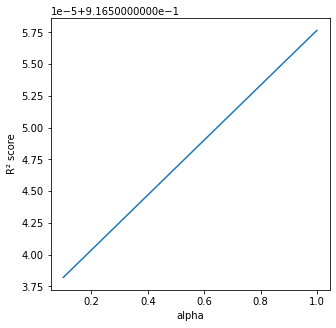

In [95]:
cv_lasso = pd.Series(mean_test_score, index = regularization_strenght)
cv_lasso.plot(figsize=(5, 5))
plt.xlabel("alpha")
plt.ylabel("R² score")

In [96]:
###### Training with hyperparameters optimization #######

# Perform grid search
print("Grid search...")

# Grid of values to be tested
params = {
    'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],
}

gridsearch = GridSearchCV(Ridge(), param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.05}
Best validation accuracy :  0.9191209046768375


In [97]:
regularization_strenght = gridsearch.get_params(deep=False)['param_grid']['alpha']
mean_test_score = gridsearch.cv_results_['mean_test_score']

Text(0, 0.5, 'R² score')

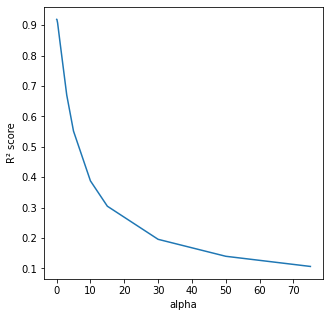

In [98]:
cv_ridge = pd.Series(mean_test_score, index = regularization_strenght)
cv_ridge.plot(figsize=(5, 5))
plt.xlabel("alpha")
plt.ylabel("R² score")